In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Cuestiones Previas

1) Dado que el redondeo en base 10 de la suma o producto de dos números es $\pm 0.5 \cdot{} \epsilon$, donde  $\epsilon$ es el valor la última cifra significativa y que el dígito eliminado es aleatorio ¿podemos suponer que el redondeo es una variable aleatoria uniforme? 

Dado que $\epsilon$ es una variable aleatoria uniforme ningún número tendrá más probabilidad que otro, luego sí podemos suponer que el redondeo es una v.a. uniforme

2) Si dibujo la gráfica de función de densidad del error por redondeo ¿Como debería ser dicha gráfica?

La gráfica de la densidad debería parecerse a la función de densidad de una uniforme en el intervalo $[0-\epsilon,0+\epsilon]$ pues el error de redondeo puede ser tanto por exceso como por defecto.

3) Si asumimos que el error de redondeo es una variable aleatoria uniforme entre $-0.5 \cdot{} \epsilon$ y $0.5 \cdot{} \epsilon$ ¿Cuál debería ser error absoluto promedio de la suma (o el producto) de un número  elevado de números en coma flotante?, da una respuesta razonada.  

Debemos aplicar que el error absoluto tanto en la suma como en el producto de dos valores es igual a la suma de los errores de ambos. Por tanto, si sumamos o multiplicamos $n$ términos, deberemos sumar los errores de los $n$ términos. En promedio, puesto que habrá errores tanto por exceso como por defecto, al sumar todos los errores el promedio tenderá a cero.

# Ejercicio 1

Consideramos la función
$$
f(x) = \frac{4x^4-59x + 324x^2 - 751x + 622}{x^4 - 14x^3 + 72x^2 - 151x +112}.
$$
Vamos a considerar también los valores $x = 1,606 + 2^{-52}i$ con $i = 0,1,\dots,800$ y a dibujar la función en esos puntos. 

¿Sale una figura continua? ¿Por qué? ¿Puedes explicar el patrón que sale? ¿Qué 
consecuencias puedes sacar sobre el redondeo?

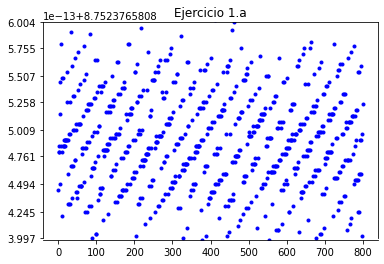

In [3]:
def plot_func(f, i_range, y_lims, i_shift=1.606, title=""):
    values = f(i_shift + 2**(-52) * i_range)
    plt.plot(i_range, values, 'b.')
    plt.ylim(y_lims[0], y_lims[1])
    plt.title(title)
    plt.show()

f1 = lambda x: (4*x**4 - 59*x**3 + 324*x**2-751*x + 622) / \
                (x**4 - 14*x**3 + 72*x**2 - 151*x + 112)
i_range = np.arange(800)
y_lims= [8.7523765807784, 8.7523765807786]
plot_func(f1, i_range, y_lims, title = "Ejercicio 1.a")



Como vemos, la figura obtenida no es una figura continua, sino que los puntos se distribuyen en líneas oblicuas. El gráfico debería ser una función continua pues el denominador [no tiene raíces reales](https://www.wolframalpha.com/input/?i=find+roots+of+%28x**4+-+14*x**3+%2B+72*x**2+-+151*x+%2B+112%29), luego nuestra función inicial es una función continua. Es por ello que esto nos muestra que el error de redondeo podría no seguir realmente una distribución uniforme al contrario de lo que hemos comentado teóricamente en las preguntas anteriores. 

### Aplicación de la regla de Horner

Consideramos la función
$$
f(x) = \frac{622+ x \ (-751 + x (324 + x (-59 + 4x)))}{112 + x \cdot (-151 + x (72 + x(-14+x)))}
$$

Esta función es la misma que la anterior, solo que hemos extraído $x$ en común cuando era posible. La definimos y la representamos

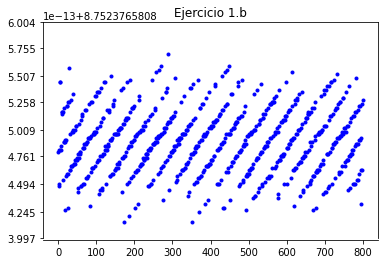

In [4]:
f2 = lambda x: (622 + x * (-751 + x * (324 + x * (-59 + 4 * x))) ) / \
                (112 + x * (-151 + x * (72 + x * (-14 + x))) )
plot_func(f2, i_range, y_lims, title = "Ejercicio 1.b")

Se puede observar que ahora los valores que obtiene la función, aunque siguen separados en líneas oblícuas, se encuentran más concentrados. Es decir, se tiene una varianza menor en estas líneas. Esto acercaría un poco los resultados  a que la distribución del error de redondeo se parezca algo más a una uniforme aunque sigue lejos de serlo. 

### ``Cambiando'' la función

Vamos ahora a dibujar la gráfica de la función:
$$
f(x) = 4- \frac{3(x-2)[(x-5)^2 + 4}{x + (x-2)^2[(x-5)^2 + 3]}
$$

Vamos a representarla en los mismos valores de $x$ y ver qué ocurre en este caso.

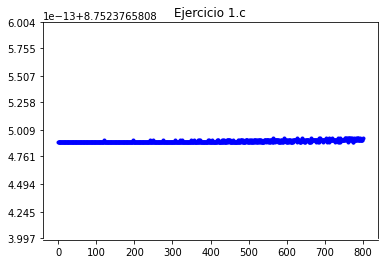

In [5]:
f3 = lambda x: 4 - ( 3 * (x-2) * ((x-5)**2 + 4) ) / \
                ( x + (x-2)**2 * ((x-5)**2 + 3) )
plot_func(f3, i_range, y_lims, title = "Ejercicio 1.c")

Vemos como en esta función, los valores quedan mucho más cercanos a ser una función continua que en los casos anteriores. Consideramos como función $f(x)$ la última escrita. Hemos de ver lo siguiente para apoyar nuestro argumento:
$$
f(x) = 4 - \frac{3 x^3 - 36 x^2 + 147 x - 174}{x^4 - 14 x^3 + 72 x^2 - 151 x + 112} = \frac{4 x^4 - 59 x^3 + 324 x^2 - 751 x + 622}{x^4 - 14 x^3 + 72 x^2 - 151 x + 112}
$$
que es la misma función que teníamos en el primer apartado. Esto nos está indicando que la forma de escribir las funciones en `python` puede afectar a cómo se distribuye finalmente el error de redondeo cuando evaluamos estas funciones. Esto es una consecuencia de que ciertas operaciones pueden inducir a mayores errores en el redondeo, como realizar potencias a un número decimal.

### Conclusiones
1) ¿Las tres funciones que hemos pintado son la misma función, solo que escrita de diferente manera? Da una respuesta razonada.

Hemos comentado y probado en los dos apartados anteriores que  que la función es la misma escrita de tres formas diferentes.
2) ¿Podemos afirmar ahora que la distribución del error por redondeo es una variable aleatoria uniforme?

Podemos ver que, aunque de forma teórica la distribución del error por redondeo es una variable aleatoria uniforme, de forma empírica demostramos que no siempre sigue esta distribución, sino que depende también de cómo realicemos las operaciones con los números en coma flotante.

3) Comenta los resultados obtenidos.

A la vista de lo anterior, vemos que los números aleatorios se agrupan formando hiperplanos


### Ejercicio opcional

Vamos a dibujar ahora las mismas gráficas para valores de $x = 2.4 + 2^{-52}i$ para $i = 0,\dots,800$, el mismo rango que el anterior. Cambiamos también los valores d elos límites de $y$.


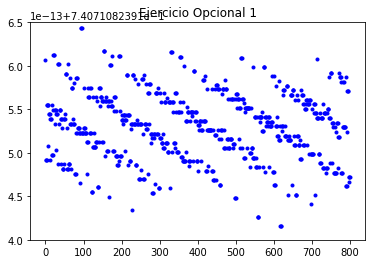

In [6]:
i_shift2 = 2.4
y_lims2 = [.7407108239094, .74071082390965]
plot_func(f1, i_range, y_lims2, i_shift2, "Ejercicio Opcional 1")

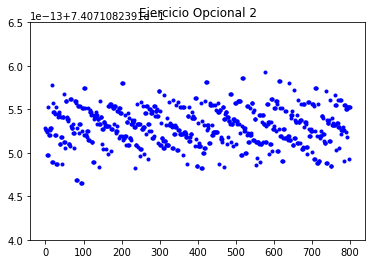

In [7]:

plot_func(f2, i_range, y_lims2, i_shift2, "Ejercicio Opcional 2")

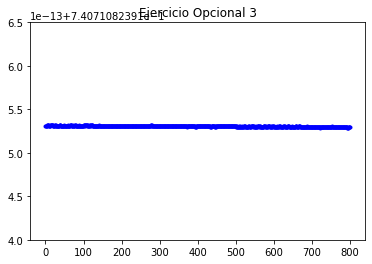

In [8]:
plot_func(f3,i_range,y_lims2,i_shift2, "Ejercicio Opcional 3")

Podemos ver como han cambiado las direcciones de los hiperplanos en los que los puntos se acumulan. Esto podría deberse a si nuestra función en ese punto está creciendo o decreciendo.

# Apartado 2: Aproximación de funciones

Antes de implementar el apartado, responded a las siguientes preguntas.

1. ¿Dado un conjunto de $n$ puntos, existe siempre un polinomio de grado m < n-1 que pase por dichos puntos?

Esto no es cierto. Podemos poner un contraejemplo.

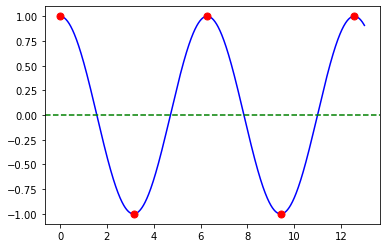

In [31]:
n = 5
func = lambda x : np.cos(x)
x_vals = np.linspace(0,13,1000)
values = func(x_vals)
plt.plot(x_vals, values, 'b')
for i in range(n):
    plt.plot(i*np.pi,func(i*np.pi),'r.',markersize=14)
plt.axhline(y=0, color='g', linestyle='--')
plt.show()
#plot_func(func,)
    

Supongamos que tenemos $n = 5$ puntos (aunque esto es replicable para cualquier $n \in \mathbb N$) y que cada punto tiene un signo diferente. Para ello, necesitamos que nuestra función pase 4 veces por el cero, es decir, tener un polinomio de grado $4$ al menos. Con este simple ejemplo, tenemos un conjunto de $n$ puntos que no puede ser aproximado por un polinomio de grado menor que $4$.

2. ¿Se te ocurre una manera en la cual el cálculo de los valores singulares de una matriz permita calcular un polinomio de regresión adecuado?

Existe un ejemplo conocido en el ámbito del aprendizaje automático. Queremos encontrar polinomio que, escrito en forma matricial, nos resuelva un problema de la forma:
$$
Xw = y,
$$
donde $X$ serán los datos a los que se le añade una columna de $1$ para obtener el término independiente del polinomio, $w$ serán los coeficientes del polinomio e $y$ serán los valores que queremos que se obtengan. Con esto, podemos utilizar la pseudoinversa de Moore-Penrose y obtener que
$$
w = (X'X)^{-1}X'y,
$$
donde al término $(X'X)^{-1}X' = X^{+}$ es la pseudoinversa de la que hablábamos. Además, vemos que:

\begin{align*}
A^+ &= (A^*A)^{-1}A^* \\
    &=(V\Sigma U^*U\Sigma V^*)^{-1} V\Sigma U^* \\
    &=(V\Sigma^2 V^*)^{-1} V\Sigma U^* \\
    &=(V^*)^{-1} \Sigma^{-2} V^{-1} V\Sigma U^* \\
    &= V \Sigma^{-2}\Sigma U^* \\
    &= V\Sigma^{-1}U^*
\end{align*}

Por lo que podemos expresar la pseudoinversa utilizando la descomposición SVD de una matriz y, por tanto, los valores singulares. Así, estaríamos resolviendo el problema de regresión polinomial usando los valores singulares.



3. ¿Como podrías transformar el problema de encontrar un polinomio de regresión en un problema de producto de matrices?

El metodo sería exactamente el mismo que el descrito anteriormente.

4. ¿Crees que, además, es posible calcular el error de regresión a partir de los valores singulares?

Con la notación de la segunda pregunta, sabemos que el error se calcula como:
$$
E(w) = ||Xw - y||,
$$
por lo que podríamos descomponer $X$ en valores singulares y utilizarlos para calcular este error.

## Ejercicio

Vamos a considerar el conjunto de datos

|i|$x_i$|$y_i$|
|---|---|---|
|1|0|1|
|2|0.25|1.2840|
|3|0.5|1.6487|
|4|0.75|2.1170|
|5|1|2.7183|

Y vamos a buscar un polinomio de grado 2, $P_2(x) = a_0 + a_1x + 1_2x^2$, que aproxime a estos datos minimizando el error.

In [59]:
# Escribimos el conjunto de datos en una matriz X
X = np.array([[0,0.25,0.5,0.75,1],[1,1.2840,1.6487,2.1170,2.7183]],dtype=object)

In [61]:
ones = [1,1,1,1,1]
X = np.transpose(np.vstack((ones,X)))
X

array([[1, 0, 1],
       [1, 0.25, 1.284],
       [1, 0.5, 1.6487],
       [1, 0.75, 2.117],
       [1, 1, 2.7183]], dtype=object)